# <center> PROYECTO CONECTOMA INFANTIL (PARTE 1) </center>

A continuación se presenta un jupyter notebook de los pasos que se siguieron para obtener las características principales usando ANOVA e INFORMACIÓN MUTUA.
Para ello fue necesario una limpieza de datos, agregar unas características y guardar la nueva base de datos. Una vez terminado esto, se realiza la selección de características y se observan las principales de cada método mediante sus distribuciones usando KDE.

___
___
## <center> 1. LIMPIEZA DE DATOS DE MRI </center>
___
En este jupyter notebook se hizo lo siguiente:
- Se carga el dataframe con las medidas morfométricas y de difusión


### Librerias y parámetros

In [1]:
# Importamos paquetes y parámetros
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,9)
plt.rcParams.update({'font.size': 22})
import pandas as pd

### Dataframe con las características

Leemos el **.csv** llamado que contiene todas las características de los cerebros de todas las regiones de todos los sujetos.

In [2]:
df_mri = pd.read_csv("All_den_brain_ct.csv")
df_mri.head()

,Subject Name,Region Name,Label,Segment,Number of voxels [voxels],Centroid_r,Centroid_a,Centroid_s,Feret diameter mm [mm],Surface area [mm2],...,md,ad,rd,T1,fa_max,md_max,ad_max,rd_max,compacidad,tortuosidad
0,Ctrl1,2 Left_Cerebral_White_Matter,0,2,232718,-16.20920,-10.65840,14.6460,157.4830,101732.000,...,0.856336,1.27333,0.647841,102.3640,0.976988,3.62479,5.55763,3.04998,0.905627,0.142739
1,Ctrl1,3 Left_Cerebral_Cortex,0,3,299293,-19.64680,-9.31513,14.6452,163.4470,181542.000,...,0.884706,1.05961,0.797251,70.5915,0.864480,4.05687,5.36720,3.49238,0.858426,0.213984
2,Ctrl1,4 Left_Lateral_Ventricle,0,4,6692,-5.57334,-14.35890,10.4600,91.1702,3900.840,...,3.132980,3.73010,2.834420,28.9789,0.481797,4.62495,6.01245,4.32484,0.900916,0.152898
3,Ctrl1,5 Left_Inf_Lat_Vent,0,5,174,-17.07500,-7.28617,-11.6416,30.6757,276.369,...,2.389790,2.89287,2.138250,56.2233,0.356381,3.31125,4.30741,3.00513,0.739793,0.436395
4,Ctrl1,7 Left_Cerebellum_White_Matter,0,7,12547,-5.47542,-24.04610,-40.4946,51.2835,5959.280,...,0.779472,1.15234,0.593040,103.3200,0.957886,3.12985,4.13925,2.83894,0.924319,0.116128


Algunas características no las necesitaremos para la selección, por lo que borramos las no necesarias como lo son:
- Centroides
- Número de Segmento

In [3]:
df_mri_dropped = df_mri.drop(columns = ["Centroid_a", "Centroid_r", "Centroid_s"])
df_mri_dropped.head()

,Subject Name,Region Name,Label,Segment,Number of voxels [voxels],Feret diameter mm [mm],Surface area [mm2],Roundness,Flatness,Elongation,...,md,ad,rd,T1,fa_max,md_max,ad_max,rd_max,compacidad,tortuosidad
0,Ctrl1,2 Left_Cerebral_White_Matter,0,2,232718,157.4830,101732.000,0.179851,1.60013,1.59982,...,0.856336,1.27333,0.647841,102.3640,0.976988,3.62479,5.55763,3.04998,0.905627,0.142739
1,Ctrl1,3 Left_Cerebral_Cortex,0,3,299293,163.4470,181542.000,0.119190,1.53573,1.45886,...,0.884706,1.05961,0.797251,70.5915,0.864480,4.05687,5.36720,3.49238,0.858426,0.213984
2,Ctrl1,4 Left_Lateral_Ventricle,0,4,6692,91.1702,3900.840,0.440247,1.59460,2.85307,...,3.132980,3.73010,2.834420,28.9789,0.481797,4.62495,6.01245,4.32484,0.900916,0.152898
3,Ctrl1,5 Left_Inf_Lat_Vent,0,5,174,30.6757,276.369,0.545375,2.90886,4.49145,...,2.389790,2.89287,2.138250,56.2233,0.356381,3.31125,4.30741,3.00513,0.739793,0.436395
4,Ctrl1,7 Left_Cerebellum_White_Matter,0,7,12547,51.2835,5959.280,0.438178,1.91512,1.06283,...,0.779472,1.15234,0.593040,103.3200,0.957886,3.12985,4.13925,2.83894,0.924319,0.116128


También existen algunas regiones que no aportan información relevante desde el punto de vista psicológico/psiquiátrico.

In [4]:
df_mri_dd = df_mri_dropped.set_index("Region Name")
df_mri_dd = df_mri_dd.drop(index = ["24 CSF", "4 Left_Lateral_Ventricle", "5 Left_Inf_Lat_Vent", "14 Third_Ventricle", "15 Fourth_Ventricle",
                                    "43 Right_Lateral_Ventricle", "44 Right_Inf_Lat_Vent"])
df_mri_dd = df_mri_dd.reset_index()

lista_region_name = np.array(df_mri_dd["Region Name"])
lista_region_name= list(dict.fromkeys(lista_region_name))
lista_region_name

['2 Left_Cerebral_White_Matter',
 '3 Left_Cerebral_Cortex',
 '7 Left_Cerebellum_White_Matter',
 '8 Left_Cerebellum_Cortex',
 '10 Left_Thalamus_Proper',
 '11 Left_Caudate',
 '12 Left_Putamen',
 '13 Left_Pallidum',
 '16 Brain_Stem',
 '17 Left_Hippocampus',
 '18 Left_Amygdala',
 '26 Left_Accumbens_area',
 '28 Left_VentralDC',
 '41 Right_Cerebral_White_Matter',
 '42 Right_Cerebral_Cortex',
 '46 Right_Cerebellum_White_Matter',
 '47 Right_Cerebellum_Cortex',
 '49 Right_Thalamus_Proper',
 '50 Right_Caudate',
 '51 Right_Putamen',
 '52 Right_Pallidum',
 '53 Right_Hippocampus',
 '54 Right_Amygdala',
 '58 Right_Accumbens_area',
 '60 Right_VentralDC']

### Creamos Volumen Normalizado

Esta característica se obtiene de la siguiente forma:
- Se obtiene el volumen total (suma) de todas las regiones y se obtiene la razón entre el volumen de la región y el total.

### <center> $ V_{normalized} =  V_{reg} / V_{sum} $ </center>

In [5]:
lista_subject_name = np.array(df_mri_dd["Subject Name"])
lista_subject_name= list(dict.fromkeys(lista_subject_name))

lista_volumen_norm = []
for k in lista_subject_name:
    total_volume = sum(df_mri_dropped[df_mri_dropped["Subject Name"] == k]["Number of voxels [voxels]"])
    for j in lista_region_name:
        lista_volumen_norm.append(float(df_mri_dropped[df_mri_dropped["Subject Name"] == k][df_mri_dropped["Region Name"] == j]["Number of voxels [voxels]"]/total_volume))

# Agregamos la lista al dataframe
df_completed = df_mri_dd.sort_values(["Subject Name", "Segment"])
df_completed["Normalized Volume"] = lista_volumen_norm
df_completed.rename({'compacidad': 'Compacidad', 'tortuosidad': 'Tortuosidad'}, axis=1, inplace=True)
df_completed.to_csv("mri_features_completed.csv")
df_completed.head()

C:\Users\ramon\AppData\Local\Temp/ipykernel_18216/4047801727.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lista_volumen_norm.append(float(df_mri_dropped[df_mri_dropped["Subject Name"] == k][df_mri_dropped["Region Name"] == j]["Number of voxels [voxels]"]/total_volume))


,Region Name,Subject Name,Label,Segment,Number of voxels [voxels],Feret diameter mm [mm],Surface area [mm2],Roundness,Flatness,Elongation,...,ad,rd,T1,fa_max,md_max,ad_max,rd_max,Compacidad,Tortuosidad,Normalized Volume
0,2 Left_Cerebral_White_Matter,Ctrl1,0,2,232718,157.4830,101732.00,0.179851,1.60013,1.59982,...,1.27333,0.647841,102.3640,0.976988,3.62479,5.55763,3.04998,0.905627,0.142739,0.181500
1,3 Left_Cerebral_Cortex,Ctrl1,0,3,299293,163.4470,181542.00,0.119190,1.53573,1.45886,...,1.05961,0.797251,70.5915,0.864480,4.05687,5.36720,3.49238,0.858426,0.213984,0.233422
2,7 Left_Cerebellum_White_Matter,Ctrl1,0,7,12547,51.2835,5959.28,0.438178,1.91512,1.06283,...,1.15234,0.593040,103.3200,0.957886,3.12985,4.13925,2.83894,0.924319,0.116128,0.009786
3,8 Left_Cerebellum_Cortex,Ctrl1,0,8,48886,64.3584,14289.10,0.452484,1.16454,1.13046,...,1.08835,0.762947,73.4209,0.822619,4.43689,5.41573,4.13518,0.955820,0.067214,0.038127
4,10 Left_Thalamus_Proper,Ctrl1,0,10,8212,36.2629,2471.96,0.796298,1.42190,1.39925,...,1.23657,0.711789,96.4611,0.855692,2.66058,3.40709,2.34645,0.978138,0.033669,0.006405


___
___
## <center> 2. SELECCIÓN DE CARACTERÍSTICAS </center>
___


In [6]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif
from sklearn.linear_model import Lasso
from numpy import array

Leemos el csv y creamos las listas de los sujetos y las regiones

In [7]:
mri_completed = pd.read_csv("mri_features_completed.csv")

lista_subject_name = np.array(mri_completed["Subject Name"])
lista_subject_name= list(dict.fromkeys(lista_subject_name))

lista_region_name = np.array(mri_completed["Region Name"])
lista_region_name= list(dict.fromkeys(lista_region_name))
mri_completed = mri_completed.iloc[:,1:]
mri_completed = mri_completed.drop(columns = ["Subject Name", "Segment"])
mri_completed

,Region Name,Label,Number of voxels [voxels],Feret diameter mm [mm],Surface area [mm2],Roundness,Flatness,Elongation,fa,md,ad,rd,T1,fa_max,md_max,ad_max,rd_max,Compacidad,Tortuosidad,Normalized Volume
0,2 Left_Cerebral_White_Matter,0,232718,157.4830,101732.000,0.179851,1.60013,1.59982,0.418687,0.856336,1.273330,0.647841,102.3640,0.976988,3.62479,5.55763,3.049980,0.905627,0.142739,0.181500
1,3 Left_Cerebral_Cortex,0,299293,163.4470,181542.000,0.119190,1.53573,1.45886,0.193094,0.884706,1.059610,0.797251,70.5915,0.864480,4.05687,5.36720,3.492380,0.858426,0.213984,0.233422
2,7 Left_Cerebellum_White_Matter,0,12547,51.2835,5959.280,0.438178,1.91512,1.06283,0.413154,0.779472,1.152340,0.593040,103.3200,0.957886,3.12985,4.13925,2.838940,0.924319,0.116128,0.009786
3,8 Left_Cerebellum_Cortex,0,48886,64.3584,14289.100,0.452484,1.16454,1.13046,0.241680,0.871414,1.088350,0.762947,73.4209,0.822619,4.43689,5.41573,4.135180,0.955820,0.067214,0.038127
4,10 Left_Thalamus_Proper,0,8212,36.2629,2471.960,0.796298,1.42190,1.39925,0.364249,0.886716,1.236570,0.711789,96.4611,0.855692,2.66058,3.40709,2.346450,0.978138,0.033669,0.006405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,52 Right_Pallidum,1,1561,25.6320,882.338,0.737538,1.56161,1.79284,0.496793,0.679589,1.055630,0.491567,103.7830,0.802667,1.05619,1.79881,0.928322,0.944780,0.086898,0.001512
296,53 Right_Hippocampus,1,3776,45.4533,2347.490,0.499538,3.11348,1.91822,0.255363,1.018210,1.283630,0.885495,72.3325,0.658139,3.17626,4.26913,2.798760,0.907029,0.144390,0.003657
297,54 Right_Amygdala,1,1650,20.8327,925.592,0.729548,1.71458,1.22533,0.350958,0.831809,1.132940,0.681243,70.4793,0.709999,2.70396,3.44686,2.421770,0.944362,0.087471,0.001598
298,58 Right_Accumbens_area,1,706,18.3303,563.206,0.680800,2.19267,1.29176,0.282000,0.750714,0.955446,0.648347,77.0666,0.568234,2.28791,2.78337,2.040180,0.912167,0.140527,0.000684


Creamos la lista de características.

In [8]:
features = list(mri_completed)
features.remove("Label")
features.remove("Region Name")
features = sorted(features)
features

['Compacidad',
 'Elongation',
 'Feret diameter mm [mm]',
 'Flatness',
 'Normalized Volume',
 'Number of voxels [voxels]',
 'Roundness',
 'Surface area [mm2]',
 'T1',
 'Tortuosidad',
 'ad',
 'ad_max',
 'fa',
 'fa_max',
 'md',
 'md_max',
 'rd',
 'rd_max']

In [9]:
def segment_feature(df, region_name, feature):
    """
    Con esta función filtraremos el segmento específico y la característica a evaluar
    :param df: dataframe
    :param region_name: región
    :param feature: característica
    :return: diccionario separado ctrl y desn, y lista.
    """
    ctrl = df[df["Region Name"] == region_name][df["Label"] == False][feature]
    ctrl = list(ctrl)
    desn = df[df["Region Name"] == region_name][df["Label"] == True][feature]
    desn = list(desn)
    dict_ctrl_desn = {"ctrl": ctrl, "desn":desn}
    list_ctrl_desn = dict_ctrl_desn["ctrl"] + dict_ctrl_desn["desn"]
    return dict_ctrl_desn, list_ctrl_desn

dcd, lcd = segment_feature(mri_completed, "2 Left_Cerebral_White_Matter", "fa")
dcd

C:\Users\ramon\AppData\Local\Temp/ipykernel_18216/2642425588.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctrl = df[df["Region Name"] == region_name][df["Label"] == False][feature]
C:\Users\ramon\AppData\Local\Temp/ipykernel_18216/2642425588.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  desn = df[df["Region Name"] == region_name][df["Label"] == True][feature]


{'ctrl': [0.418687, 0.430633, 0.387069, 0.450977, 0.421001, 0.431355],
 'desn': [0.391355, 0.433643, 0.419248, 0.431242, 0.43063, 0.41591]}

In [10]:
def data_target(df, region_name):
    """
    Función para separar datos de los targets o labels.
    :param df: dataframe
    :param region_name: región
    :return: datos sin target, target
    """
    data = df[df["Region Name"] == region_name]
    target = data["Label"]
    return data.drop(columns = ["Label", "Region Name"]), target

data, target = data_target(mri_completed,"2 Left_Cerebral_White_Matter")
data

,Number of voxels [voxels],Feret diameter mm [mm],Surface area [mm2],Roundness,Flatness,Elongation,fa,md,ad,rd,T1,fa_max,md_max,ad_max,rd_max,Compacidad,Tortuosidad,Normalized Volume
0,232718,157.483,101732.0,0.179851,1.60013,1.59982,0.418687,0.856336,1.27333,0.647841,102.3640,0.976988,3.62479,5.55763,3.04998,0.905627,0.142739,0.181500
25,180060,157.864,89351.3,0.172582,1.60723,1.74591,0.430633,0.836325,1.25771,0.625631,102.2500,0.981225,3.70382,4.74384,3.23562,0.891571,0.164122,0.169615
50,173811,153.734,81459.9,0.184895,1.62804,1.71246,0.387069,0.932946,1.33213,0.733354,99.7813,0.974640,4.01810,5.04189,3.65819,0.898702,0.153345,0.173644
75,202021,160.577,93303.2,0.178451,1.81849,1.67071,0.450977,0.778497,1.17885,0.578323,102.0390,0.969484,3.73384,5.58860,3.25803,0.899564,0.151971,0.174126
100,171021,152.201,86493.7,0.172266,1.56938,1.72091,0.421001,0.831063,1.24034,0.626425,101.2020,0.955921,3.60335,4.49234,3.15885,0.889113,0.167869,0.164773
125,219854,160.860,103478.0,0.170240,1.56559,1.70059,0.431355,0.820219,1.23311,0.613775,101.6400,0.988122,3.82406,4.75505,3.35856,0.896934,0.155912,0.177885
150,169781,153.473,85698.2,0.173024,1.41801,1.79100,0.391355,0.851147,1.23416,0.659638,101.0020,0.969714,3.35945,4.49719,3.07747,0.889933,0.166633,0.168845
175,166241,153.815,89020.9,0.164242,1.57641,1.72032,0.433643,0.808328,1.22027,0.602355,99.7186,0.977147,3.28870,4.55269,2.97865,0.881529,0.179368,0.153798
200,161739,151.572,85217.6,0.168460,1.59678,1.67219,0.419248,0.820177,1.22095,0.619792,100.9190,0.969743,4.13924,5.00879,3.77525,0.883966,0.175693,0.163283
225,176247,153.509,84990.9,0.178865,1.55508,1.72943,0.431242,0.821248,1.23639,0.613677,101.6680,0.983866,3.23018,4.00305,2.84375,0.895645,0.157966,0.170745


___
## <center> ANOVA </center>

A continuación aplicaremos ANOVA para encontrar las características más importantes usando su F-value y P-value.


In [11]:
import scipy.stats as stats

def value(df, feature, value):
    """
    Función para obtener f value y p value.
    :param df: dataframe
    :param feature: característica para filtrar dataframe
    :param value: "p" o "f"
    :return: p_value ó f_value
    """
    fvalue, pvalue = stats.f_oneway(df[feature][0:6], df[feature][6:12])
    if value == "f":
        return fvalue
    if value == "p":
        return pvalue

p_value = value(data,"Normalized Volume", "p")
f_value = value(data,"Normalized Volume", "f")
print("F value = " + str(f_value) + "\nP value = " + str(p_value))

F value = 8.795729502577338
P value = 0.014148052537395154


In [12]:
lista_nivel0 = []
for reg in lista_region_name:
    lista_nivel1 = []
    for feat in features:
        data, target = data_target(mri_completed,reg)
        p_value = value(data,feat, "p")
        f_value = value(data,feat, "f")
        lista_nivel2 = [reg, feat, f_value, p_value]
        lista_nivel1.append(lista_nivel2)
    lista_nivel0 = lista_nivel0 + lista_nivel1

df_values = pd.DataFrame(lista_nivel0, columns=["Region", "Feature", "F-value", "P-value"])
df_values.sort_values("F-value", ascending=False).head(10)

,Region,Feature,F-value,P-value
258,42 Right_Cerebral_Cortex,Roundness,21.779718,0.000885
24,3 Left_Cerebral_Cortex,Roundness,12.776271,0.005059
146,16 Brain_Stem,Feret diameter mm [mm],12.555338,0.005327
256,42 Right_Cerebral_Cortex,Normalized Volume,11.528300,0.006824
374,52 Right_Pallidum,md,10.757488,0.008291
92,11 Left_Caudate,Feret diameter mm [mm],10.125171,0.009786
154,16 Brain_Stem,ad,9.406549,0.011901
22,3 Left_Cerebral_Cortex,Normalized Volume,9.277397,0.012338
4,2 Left_Cerebral_White_Matter,Normalized Volume,8.795730,0.014148
313,49 Right_Thalamus_Proper,Surface area [mm2],8.342117,0.016155


Nivel de significancia de 0.05

34


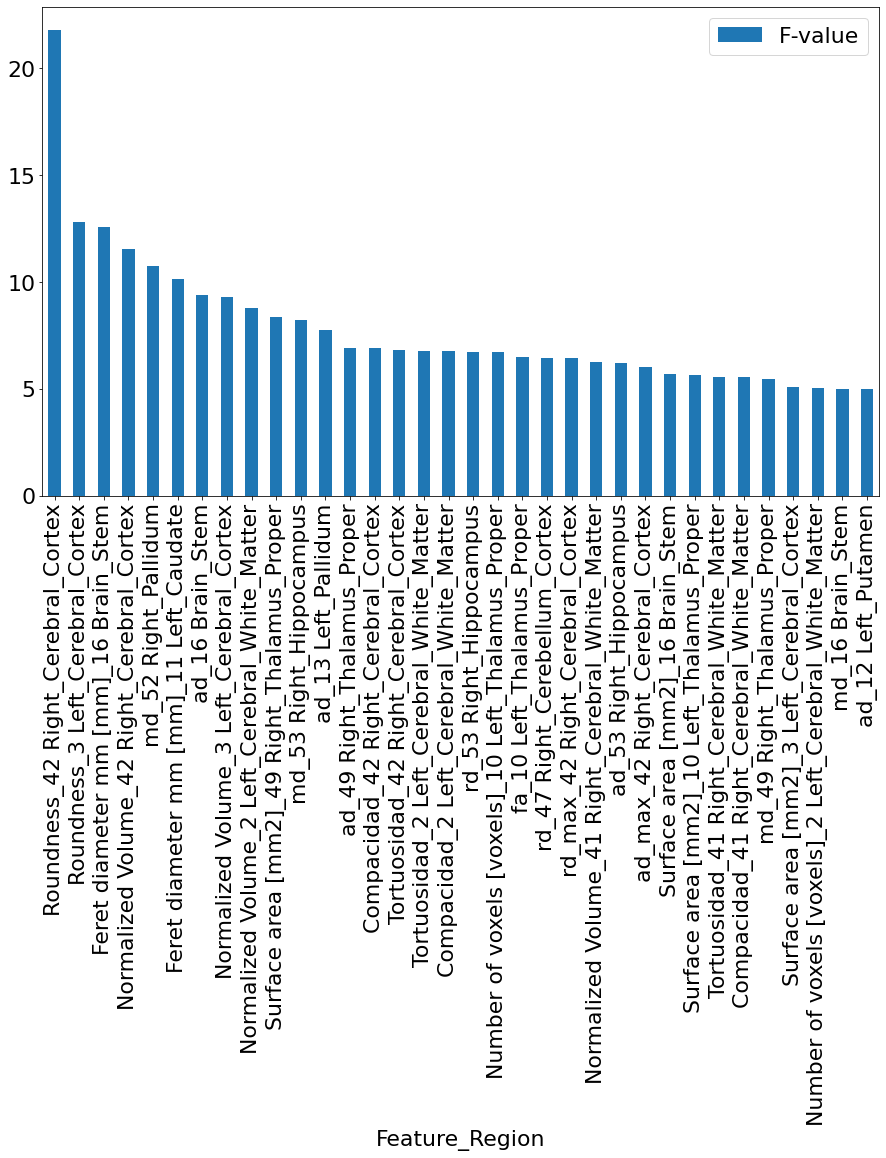

In [13]:
df_features_05 = df_values[df_values["P-value"] < 0.05].sort_values("P-value", ascending=True)

def column_fr(df):
    list_f_r = []
    for i in range(0, len(df)):
        list_f_r.append(df["Feature"].iloc[i] + "_" + df["Region"].iloc[i])
    df["Feature_Region"] = list_f_r

# df_mi_features_035["Feature_Region"] = list_f_r
print(len(df_features_05))
column_fr(df_features_05)
df_features_05.plot(x = "Feature_Region" , y = "F-value", kind = "bar")
plt.show()

Nivel de significancia de 0.01

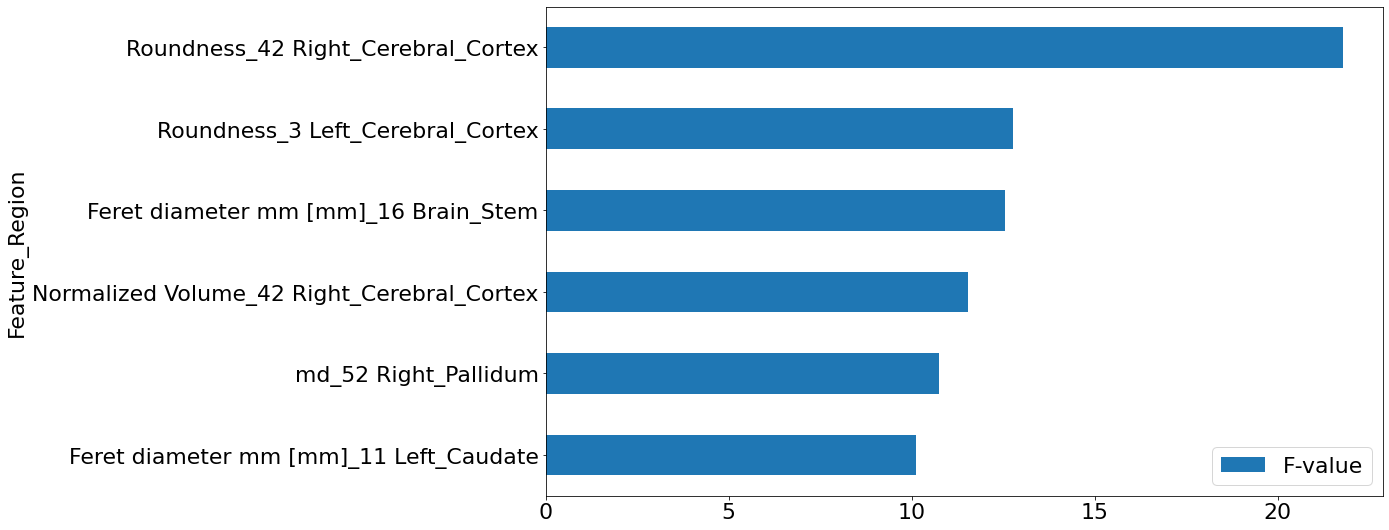

In [43]:
df_features_01 = df_values[df_values["P-value"] < 0.01].sort_values("P-value", ascending=False)
def column_fr(df):
    list_f_r = []
    for i in range(0, len(df)):
        list_f_r.append(df["Feature"].iloc[i] + "_" + df["Region"].iloc[i])
    df["Feature_Region"] = list_f_r

# df_mi_features_035["Feature_Region"] = list_f_r
column_fr(df_features_01)
df_features_01.plot(x = "Feature_Region" , y = "F-value", kind = "barh")
plt.show()
df_features_ANOVA_01 = df_values[df_values["P-value"] < 0.01].sort_values("P-value", ascending=True)

___
## <center> INFORMACIÓN MUTUA </center>



In [15]:
mi_scores_all = pd.DataFrame()
for reg in lista_region_name:
        X, y = data_target(mri_completed,reg)
        for colname in X.select_dtypes("object"):
            X[colname], _ = X[colname].factorize()

        # All discrete features should now have integer dtypes (double-check this before using MI!)
        discrete_features = X.dtypes == int

        from sklearn.feature_selection import mutual_info_classif,mutual_info_regression

        def make_mi_scores(X, y, discrete_features):
            mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
            mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
            mi_scores = mi_scores.sort_values(ascending=False)
            return mi_scores

        mi_scores = make_mi_scores(X, y, discrete_features)

        mi_scores = pd.DataFrame(mi_scores)
        mi_scores = mi_scores.reset_index()

        list_region= [reg for i in range(len(mi_scores))]
        mi_scores["Region"] = list_region
        mi_scores.columns = ["Feature", "MI score", "Region"]

        mi_scores_all = pd.concat([mi_scores_all, mi_scores])
mi_scores_all = mi_scores_all.sort_values("MI score", ascending=False)


In [16]:
mi_scores_all[mi_scores_all["MI score"]>0.25]

,Feature,MI score,Region
0,Roundness,0.503806,42 Right_Cerebral_Cortex
1,Normalized Volume,0.496167,42 Right_Cerebral_Cortex
0,rd_max,0.447457,17 Left_Hippocampus
0,Feret diameter mm [mm],0.413528,16 Brain_Stem
0,Elongation,0.380790,50 Right_Caudate
1,ad,0.376987,17 Left_Hippocampus
1,ad,0.375334,16 Brain_Stem
0,Normalized Volume,0.349540,3 Left_Cerebral_Cortex
1,Roundness,0.335651,3 Left_Cerebral_Cortex
0,rd,0.318290,52 Right_Pallidum


In [17]:
df_features_05[["Feature", "Region"]]

,Feature,Region
258,Roundness,42 Right_Cerebral_Cortex
24,Roundness,3 Left_Cerebral_Cortex
146,Feret diameter mm [mm],16 Brain_Stem
256,Normalized Volume,42 Right_Cerebral_Cortex
374,md,52 Right_Pallidum
92,Feret diameter mm [mm],11 Left_Caudate
154,ad,16 Brain_Stem
22,Normalized Volume,3 Left_Cerebral_Cortex
4,Normalized Volume,2 Left_Cerebral_White_Matter
313,Surface area [mm2],49 Right_Thalamus_Proper


MI score arriba de 0.25

C:\Users\ramon\AppData\Local\Temp/ipykernel_18216/3868528842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Feature_Region"] = list_f_r


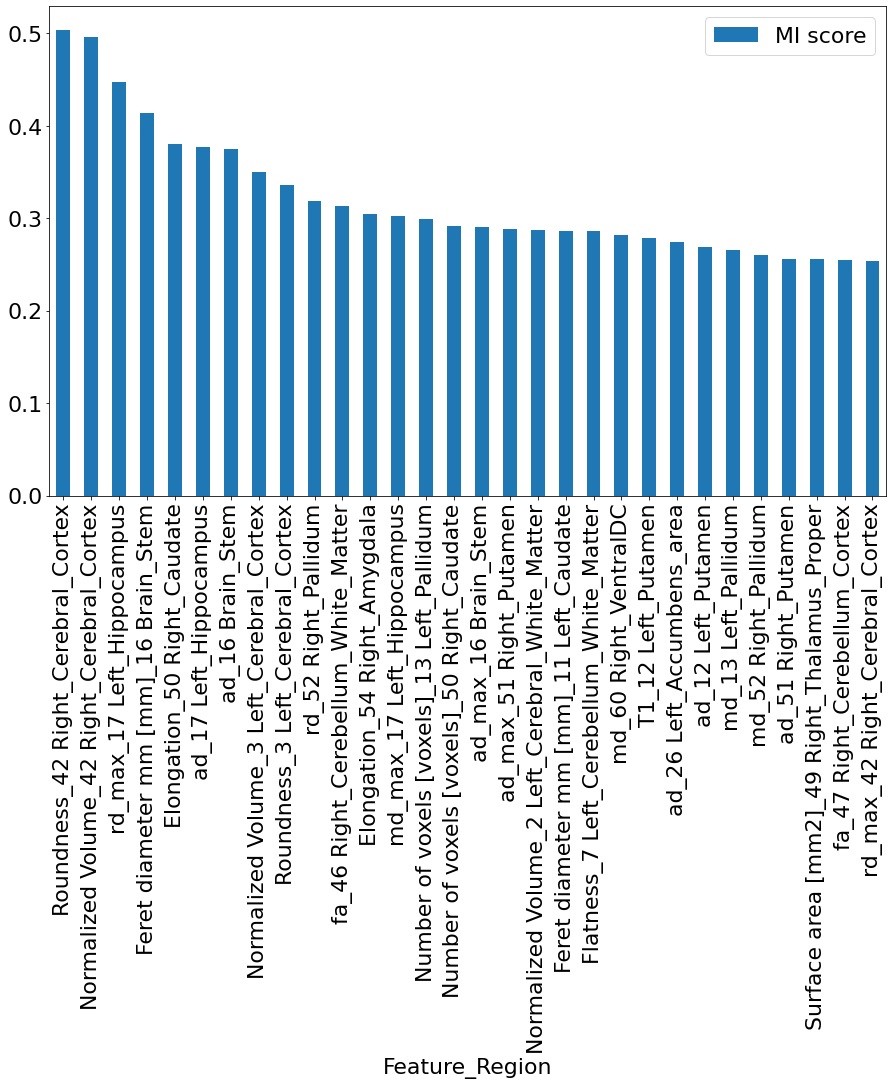

In [19]:
df_mi_features_025 = mi_scores_all[mi_scores_all["MI score"]>0.25]
def column_fr(df):
    list_f_r = []
    for i in range(0, len(df)):
        list_f_r.append(df["Feature"].iloc[i] + "_" + df["Region"].iloc[i])
    df["Feature_Region"] = list_f_r

# df_mi_features_035["Feature_Region"] = list_f_r
column_fr(df_mi_features_025)
df_mi_features_025.plot(x = "Feature_Region" , y = "MI score", kind = "bar")
plt.show()

MI score arriba de 0.35

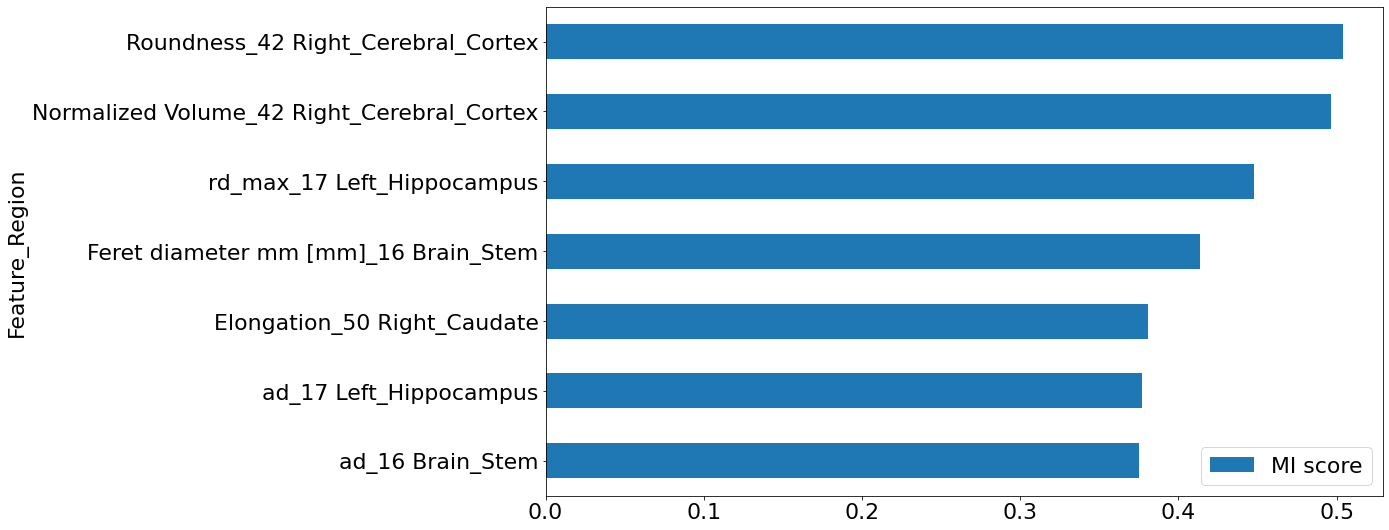

In [20]:
df_mi_features_035 = mi_scores_all[mi_scores_all["MI score"]>0.35].sort_values("MI score", ascending = True)

def column_fr(df):
    list_f_r = []
    for i in range(0, len(df)):
        list_f_r.append(df["Feature"].iloc[i] + "_" + df["Region"].iloc[i])
    df["Feature_Region"] = list_f_r

# df_mi_features_035["Feature_Region"] = list_f_r
column_fr(df_mi_features_035)
df_mi_features_035.plot(x = "Feature_Region" , y = "MI score", kind = "barh")
plt.show()

___
___
## <center> KERNEL DENSITY ESTIMATION </center>
___

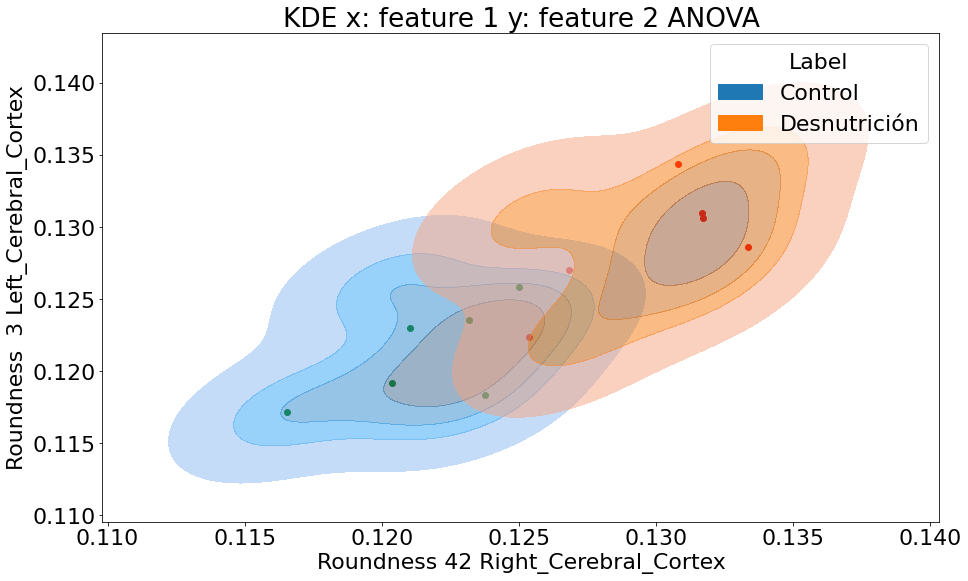

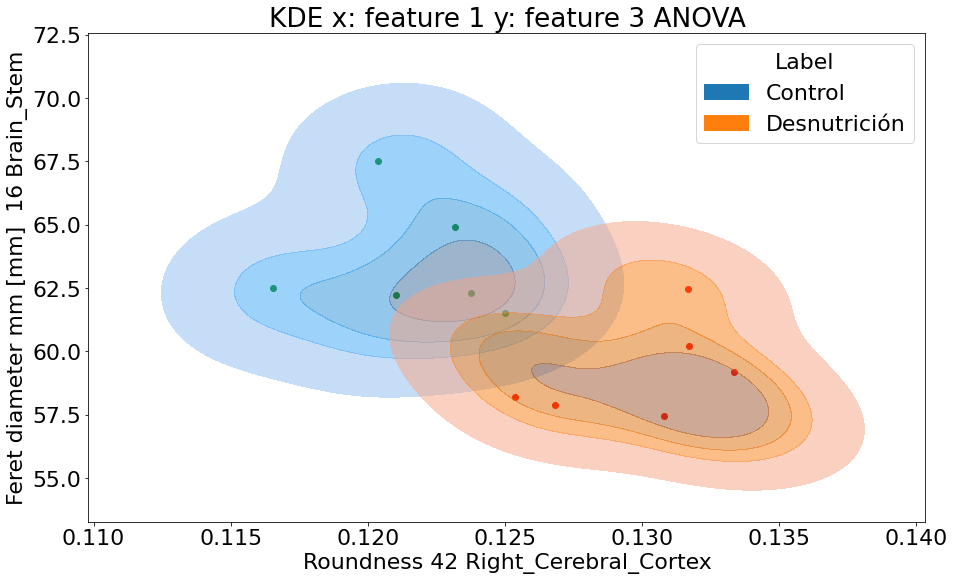

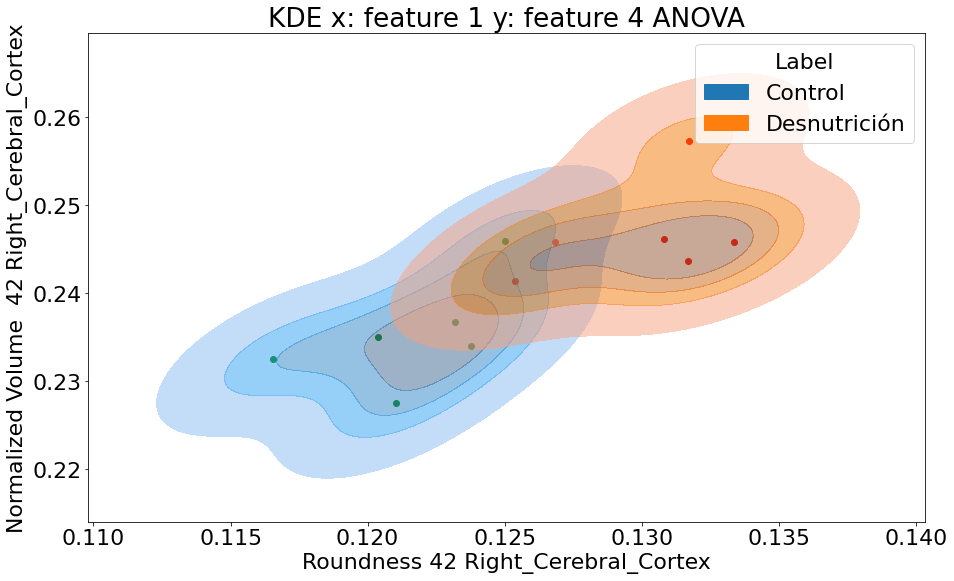

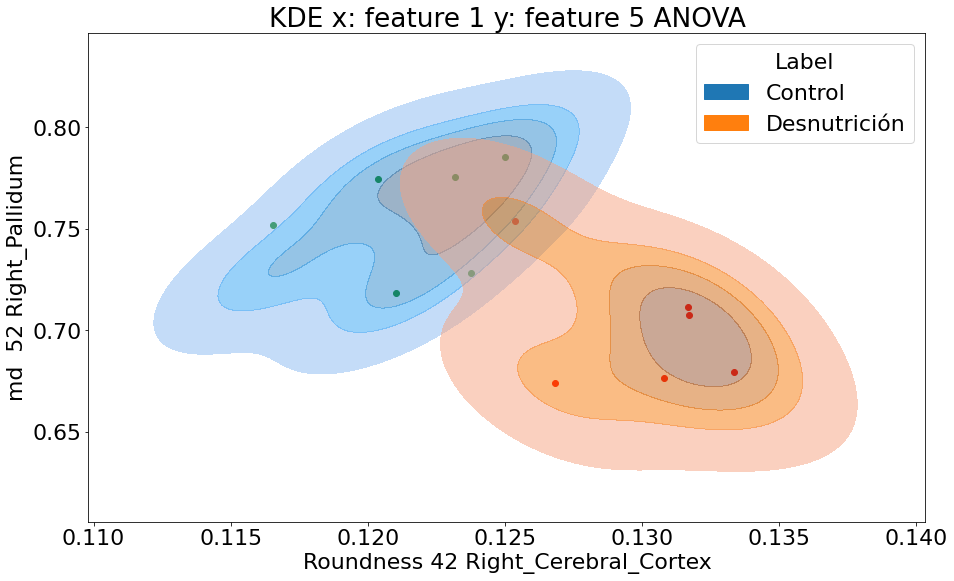

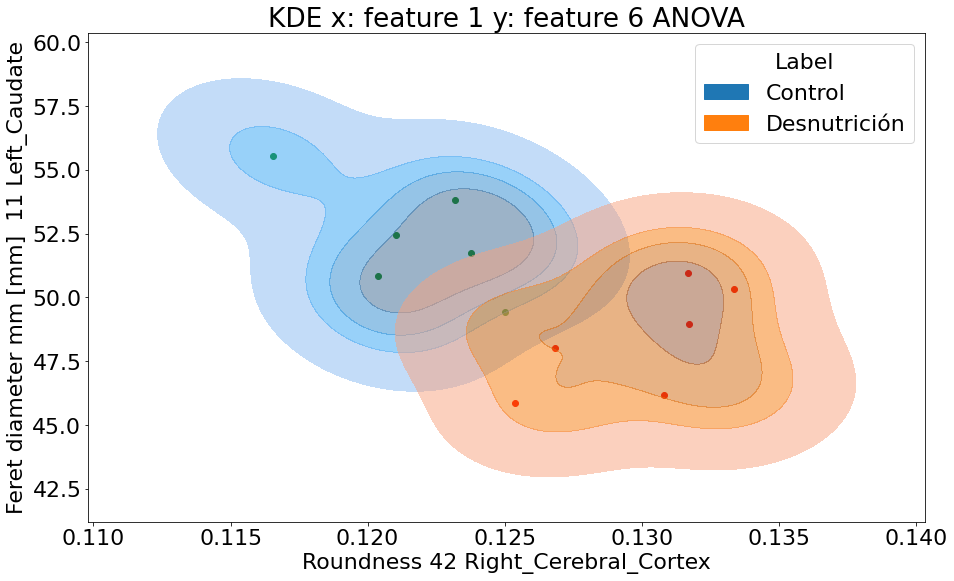

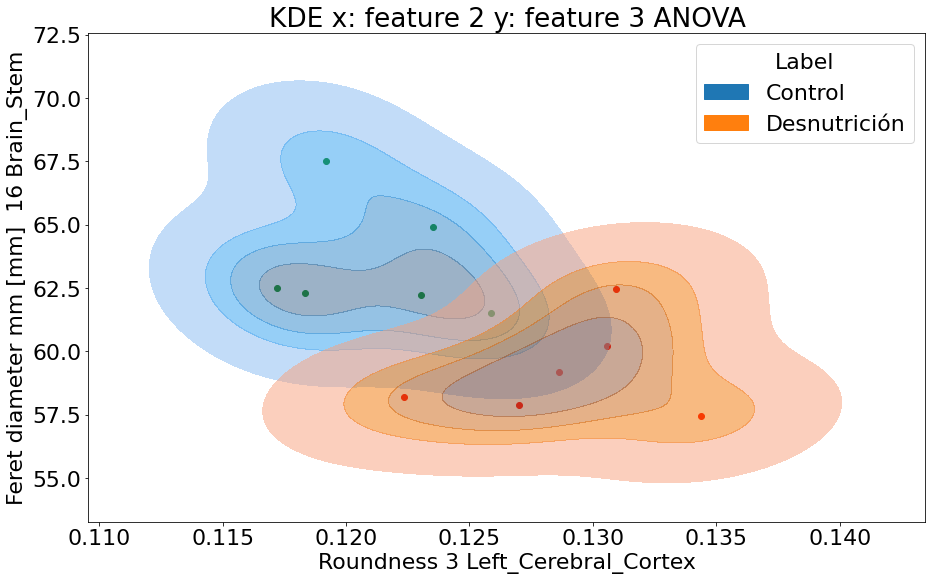

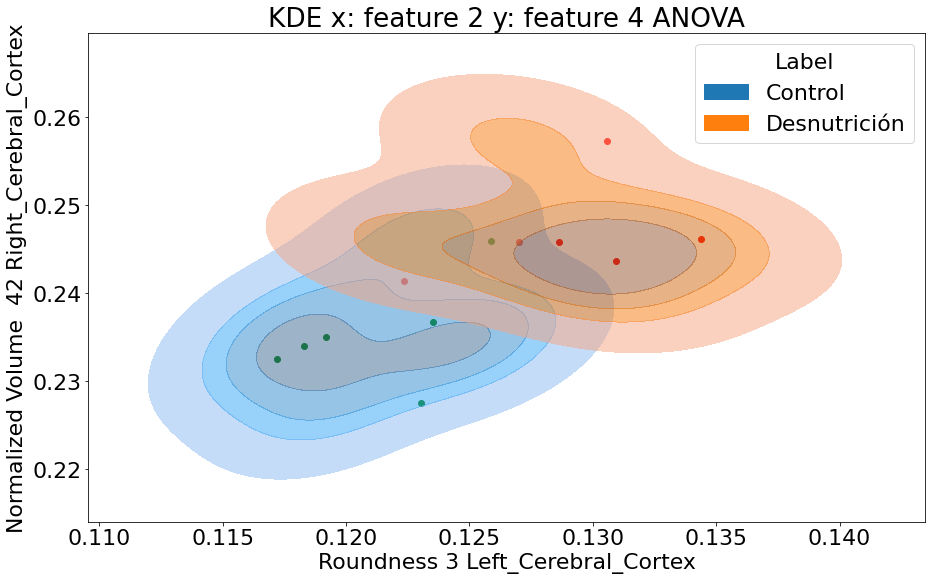

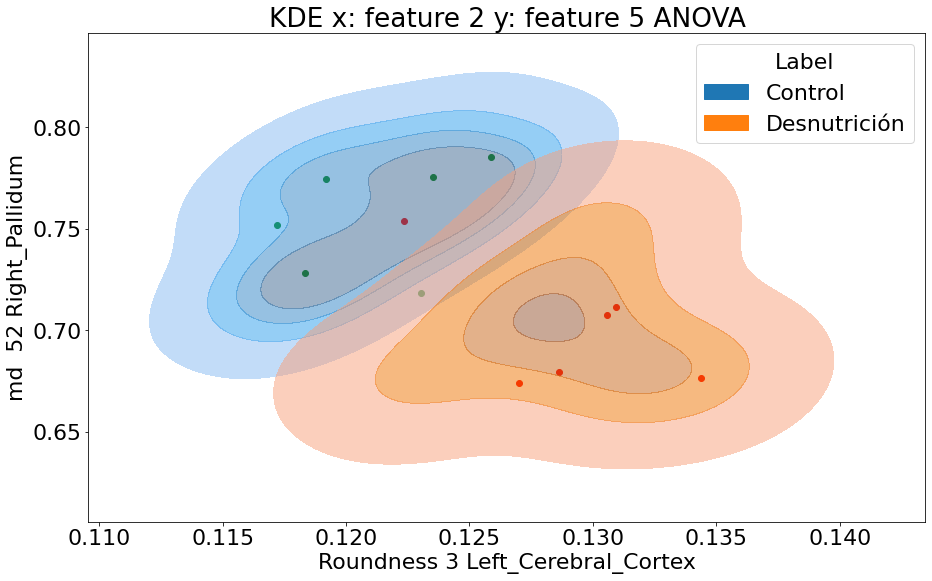

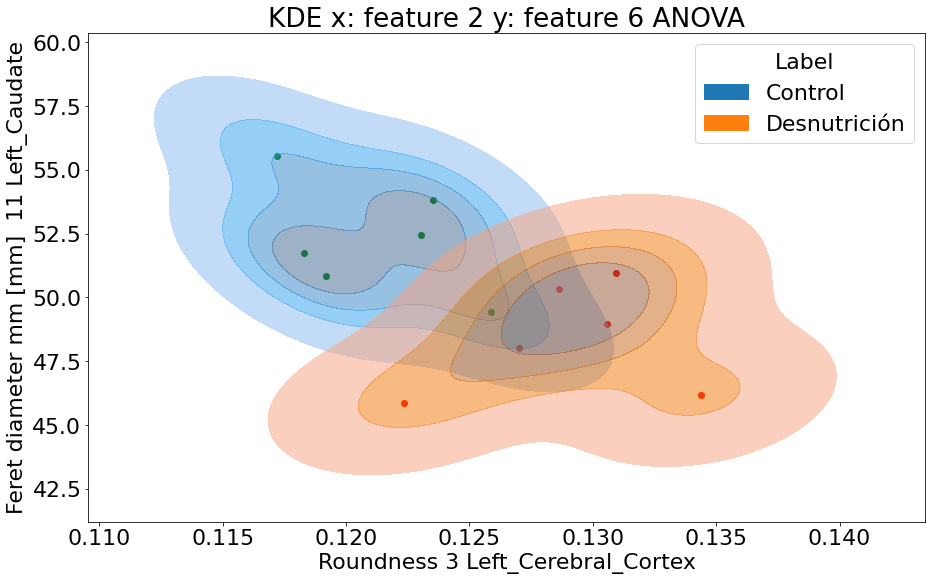

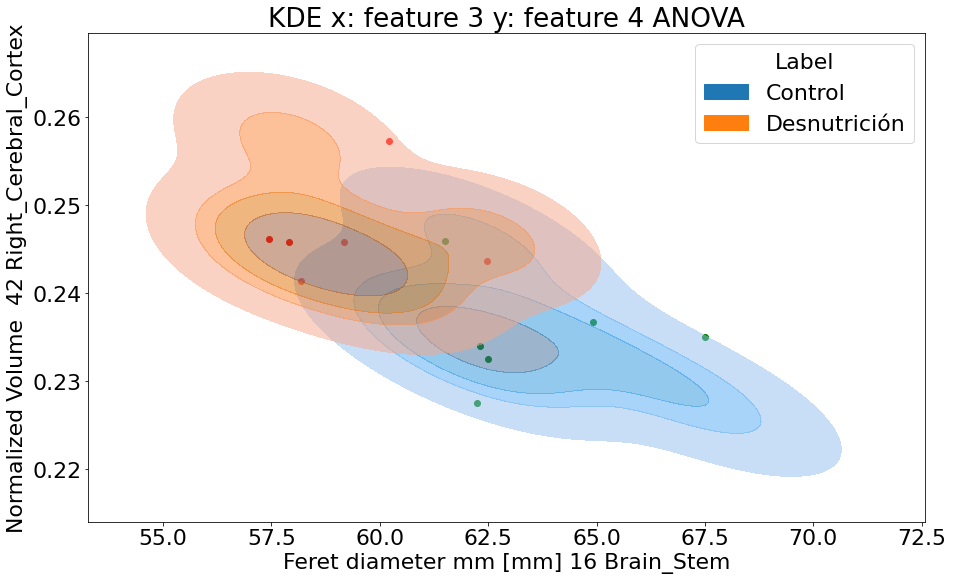

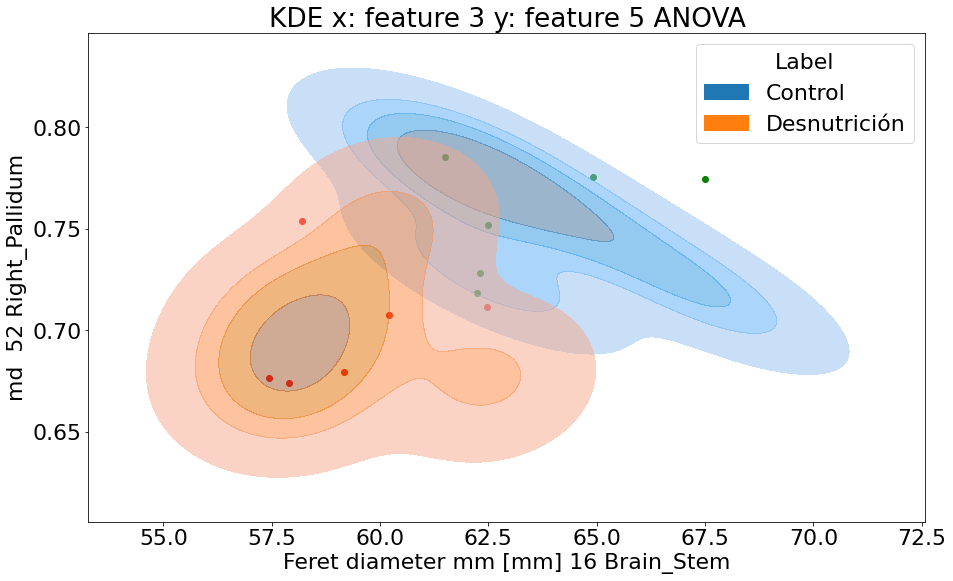

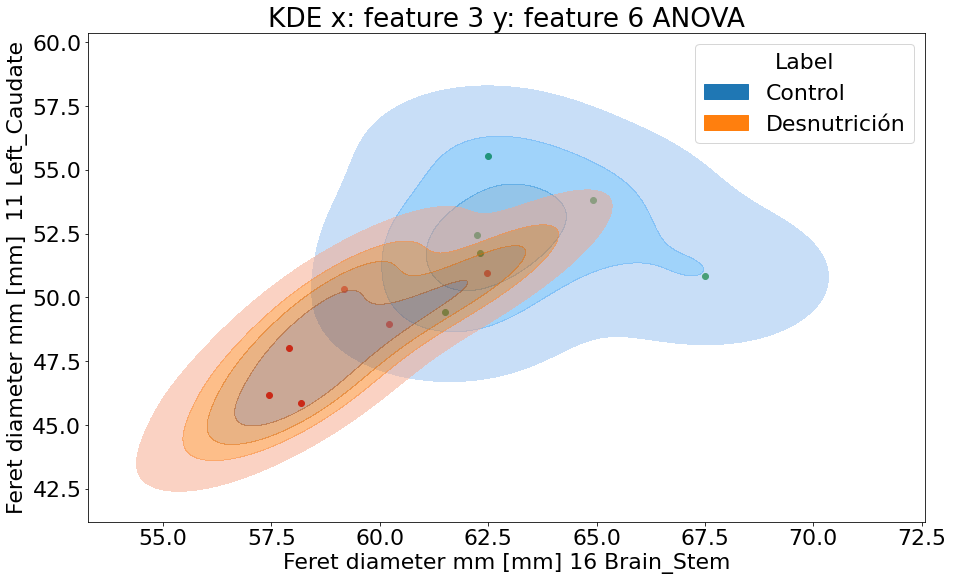

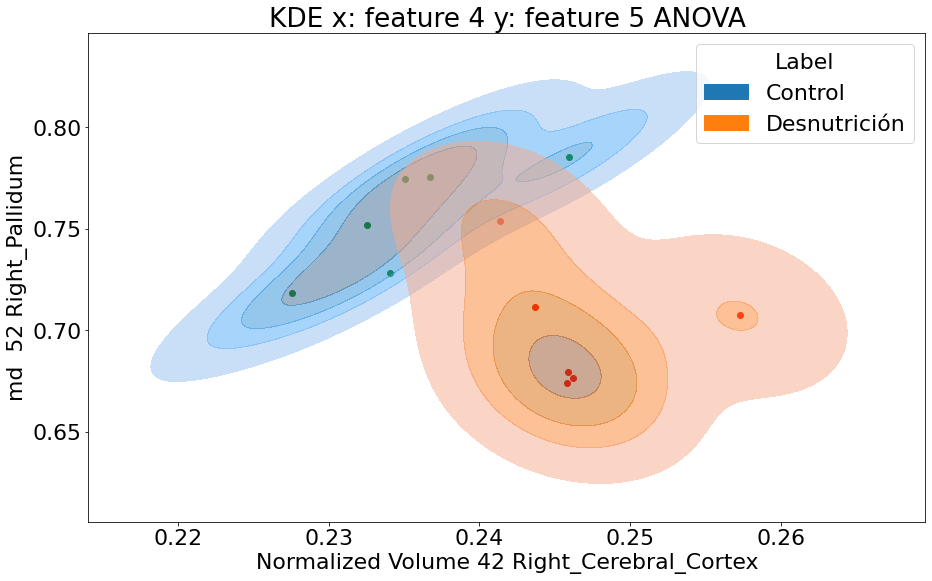

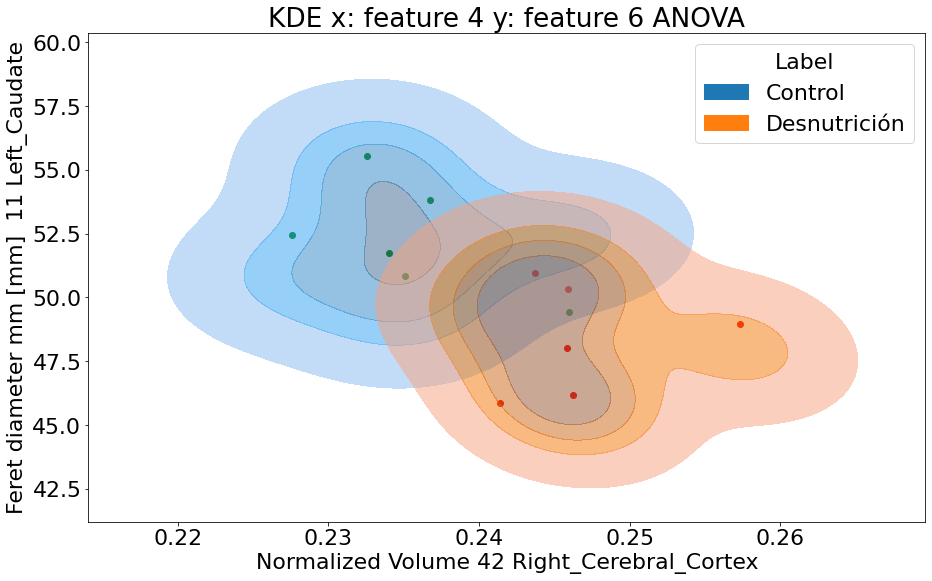

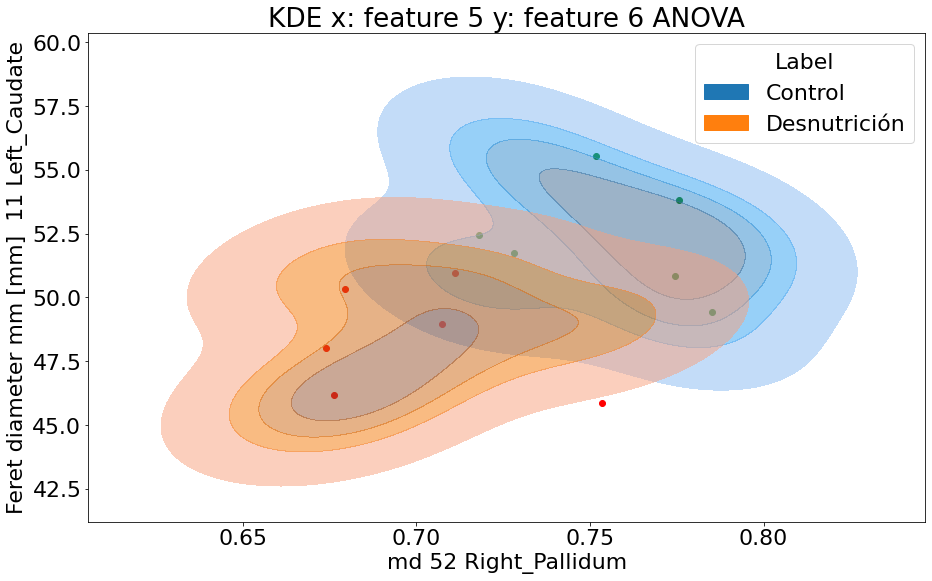

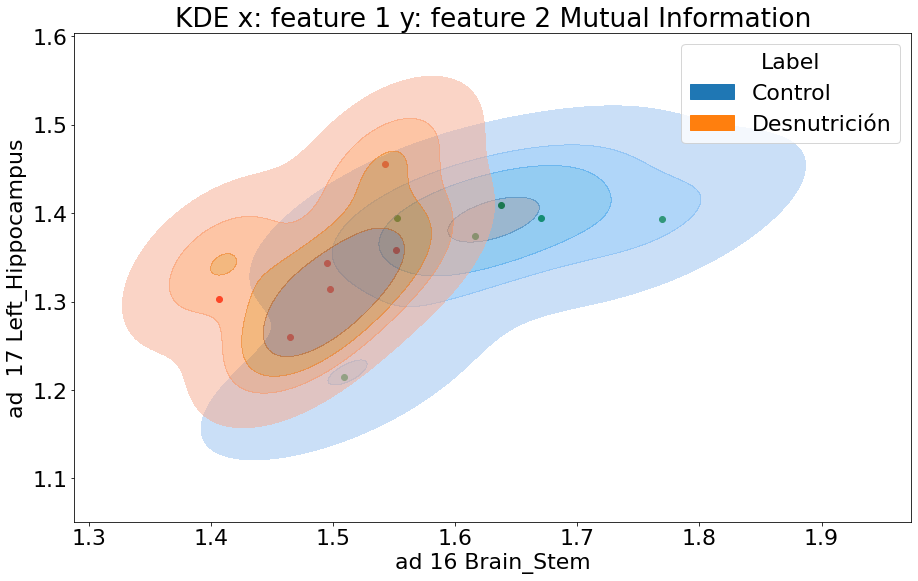

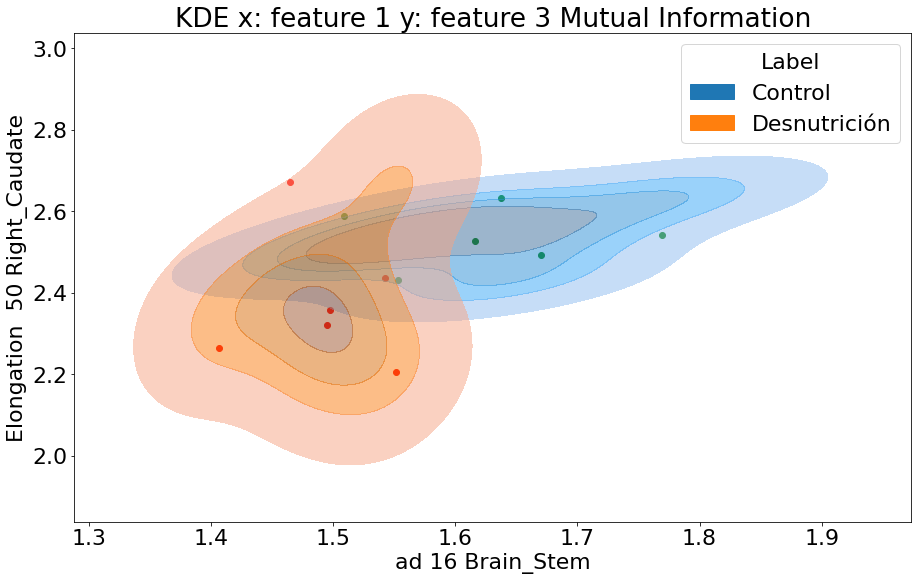

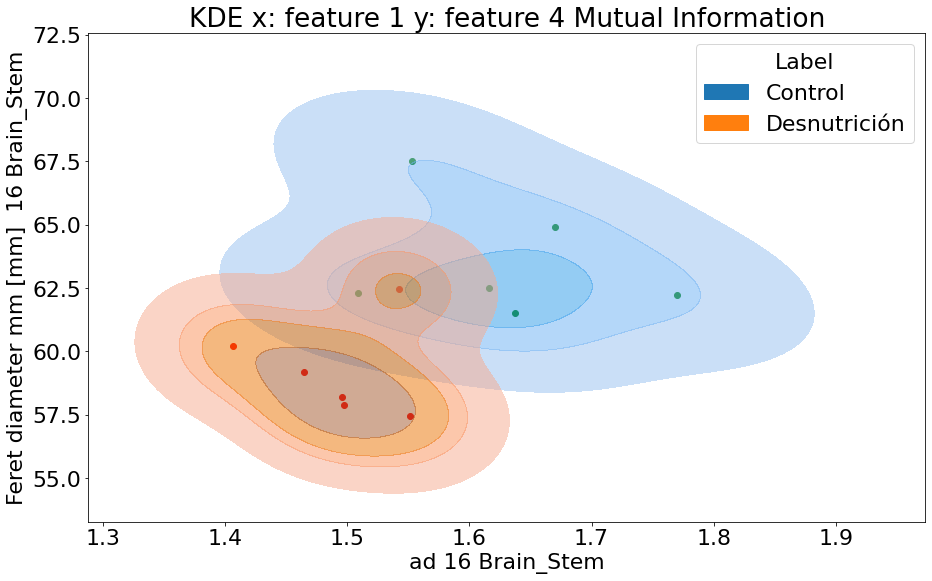

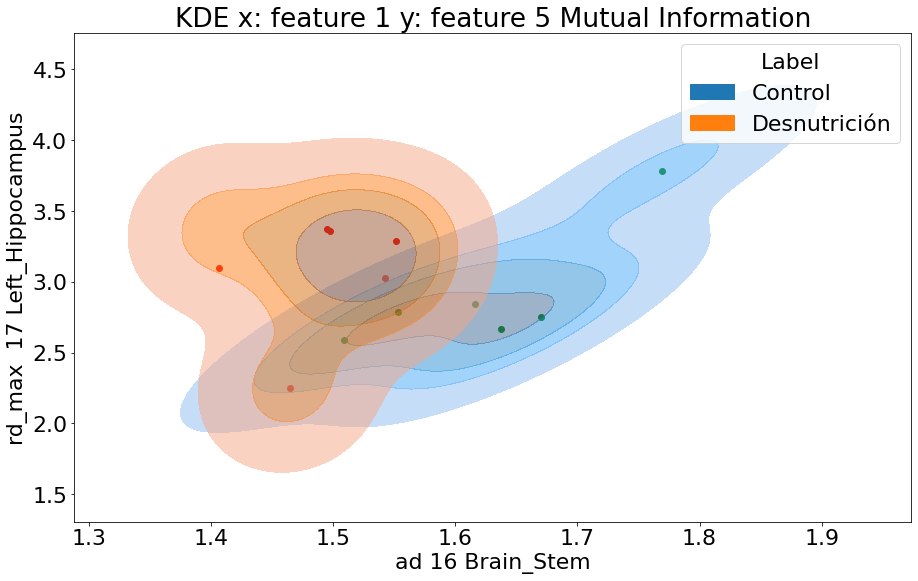

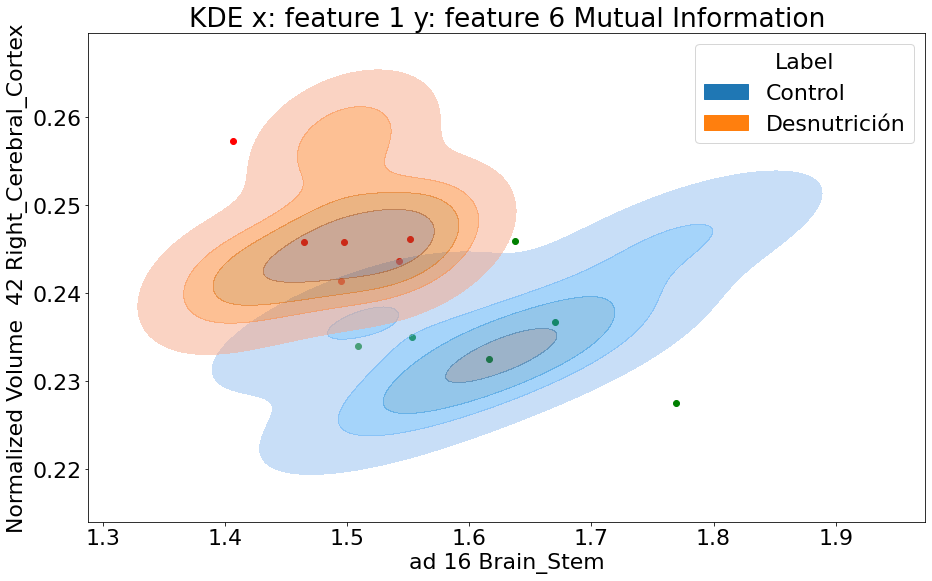

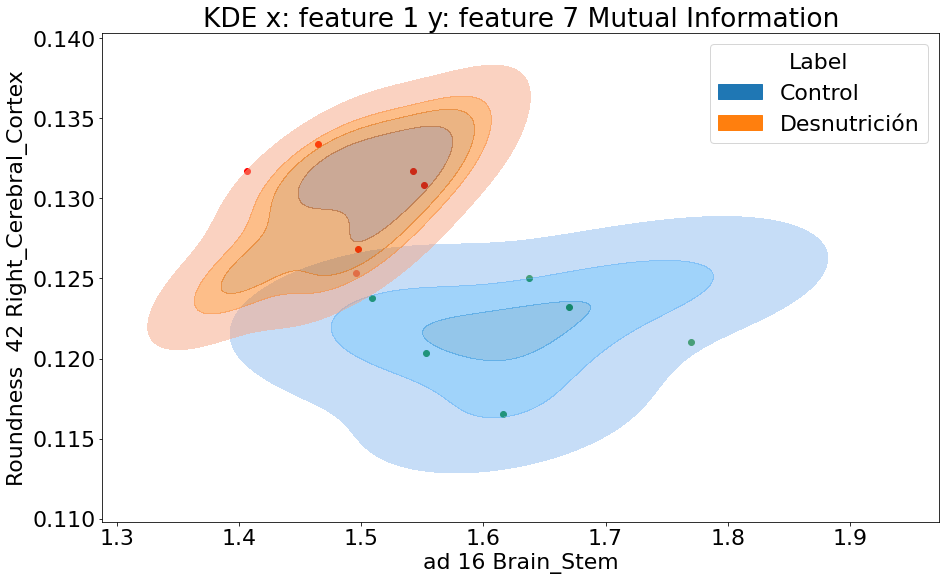

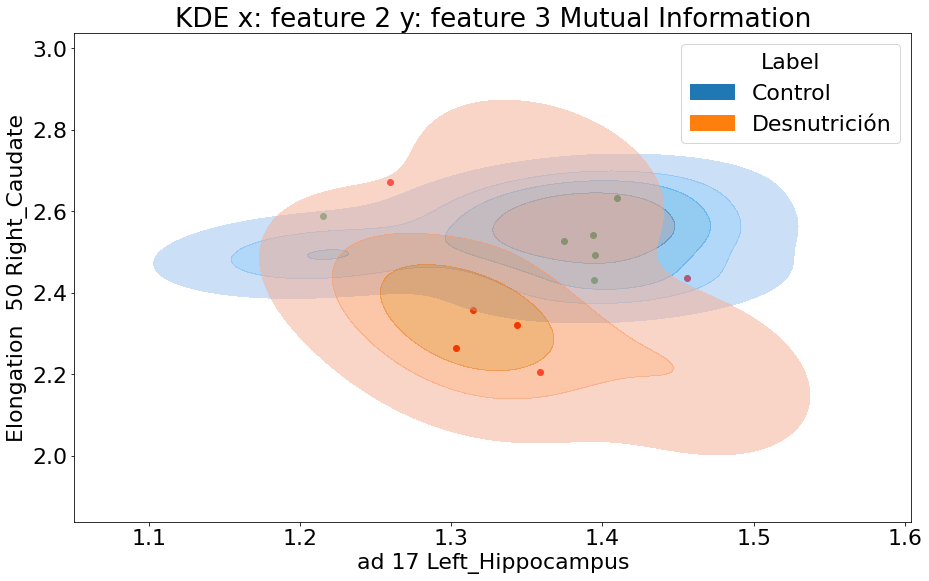

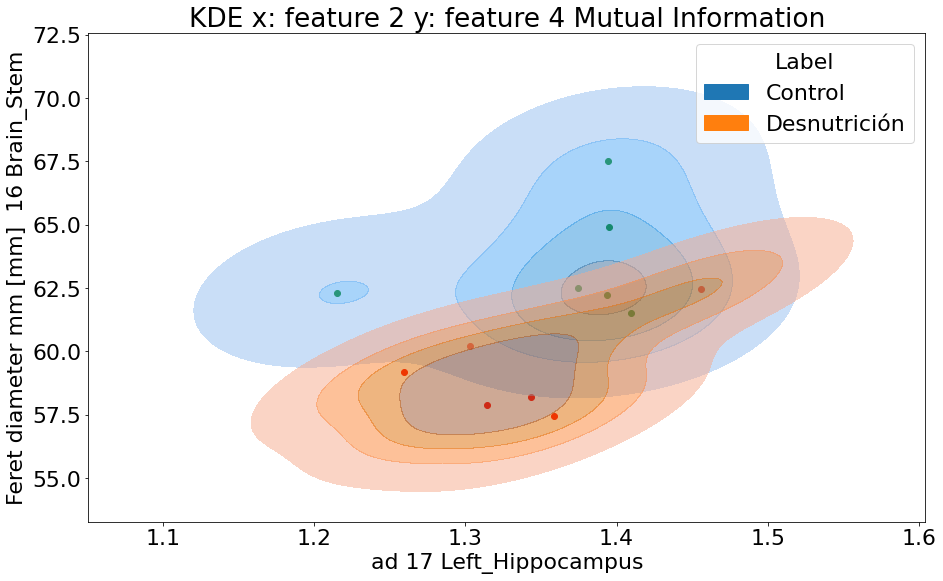

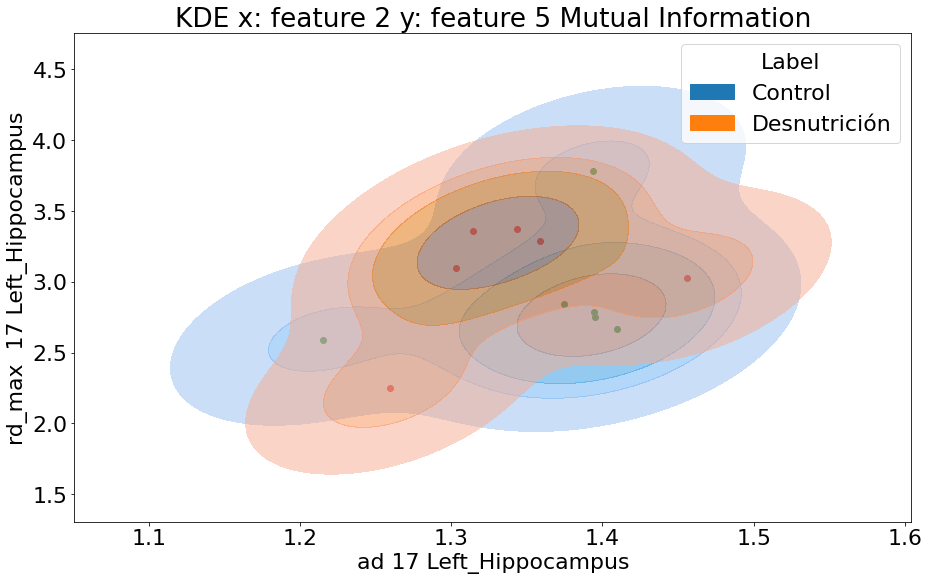

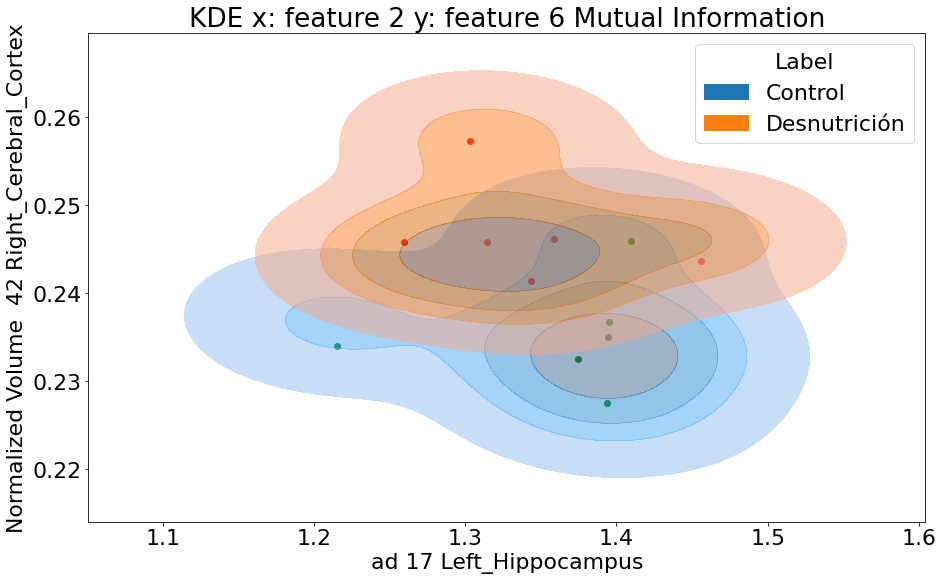

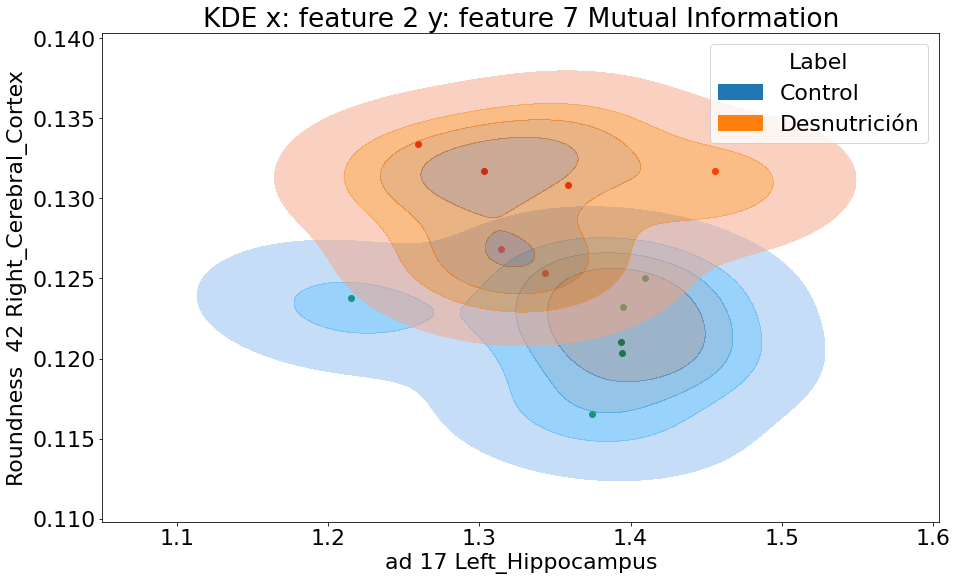

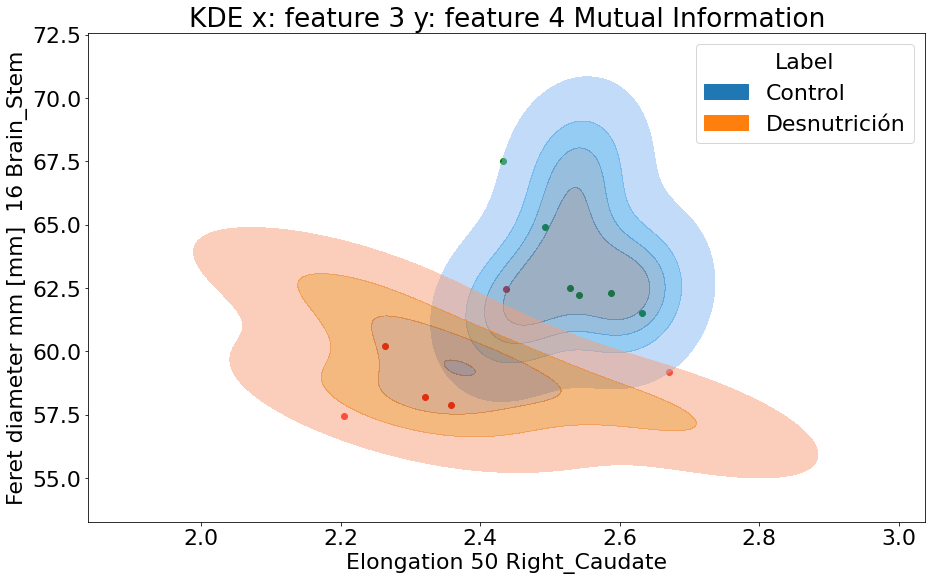

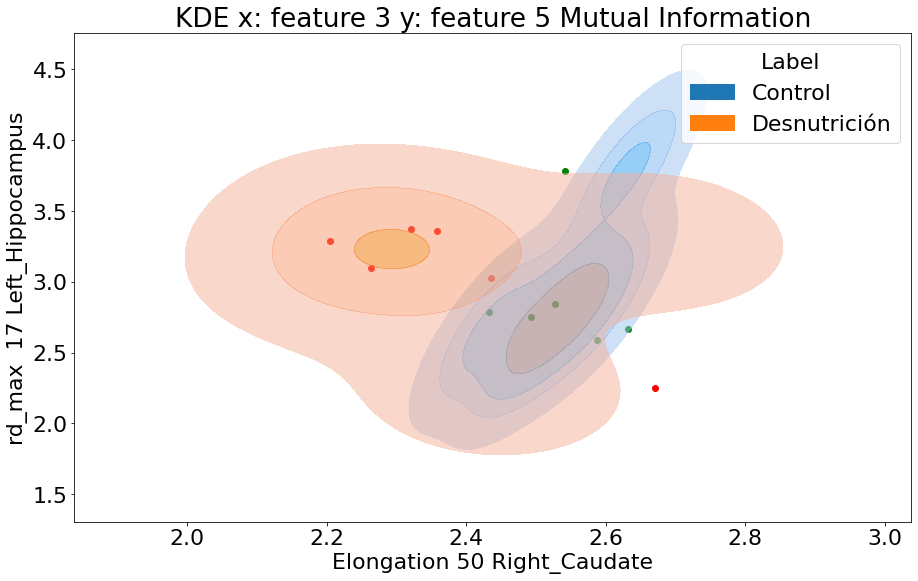

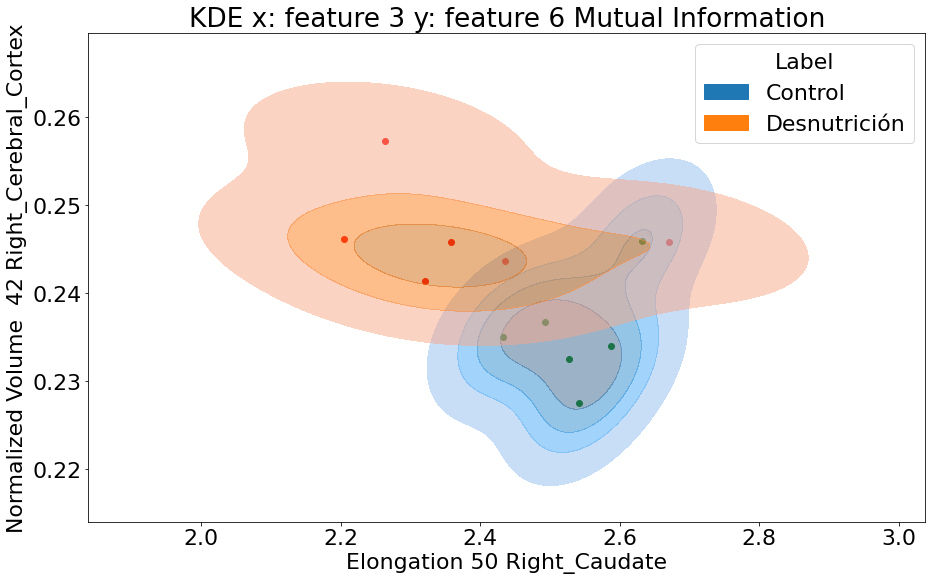

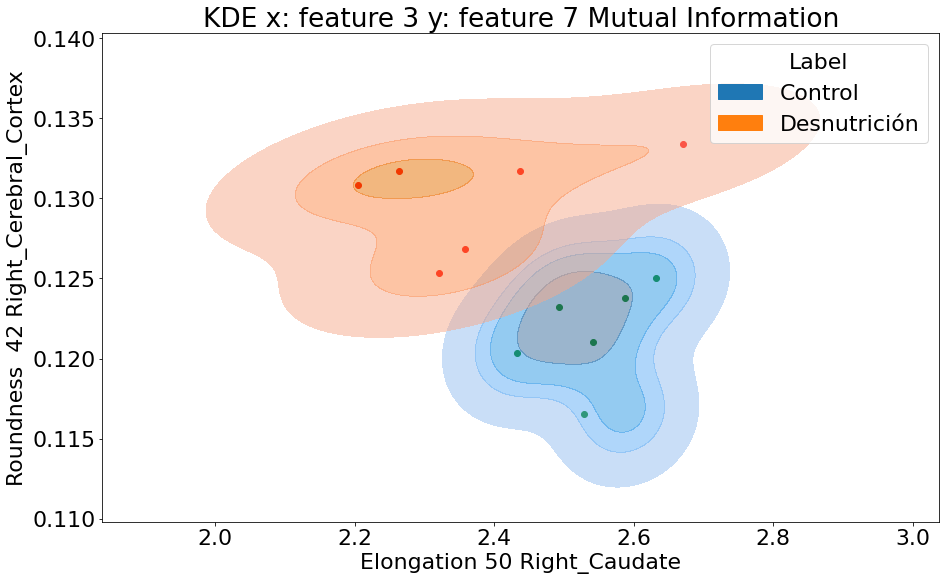

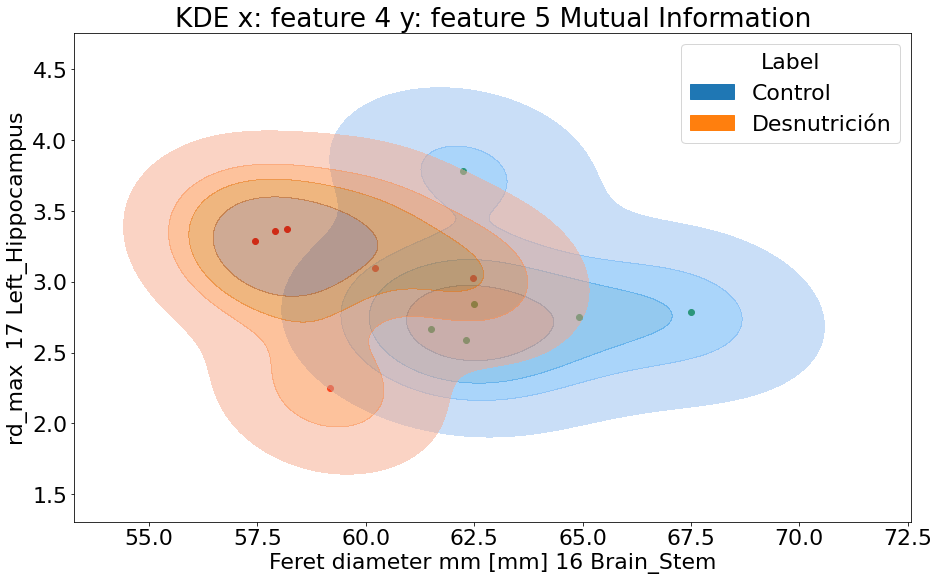

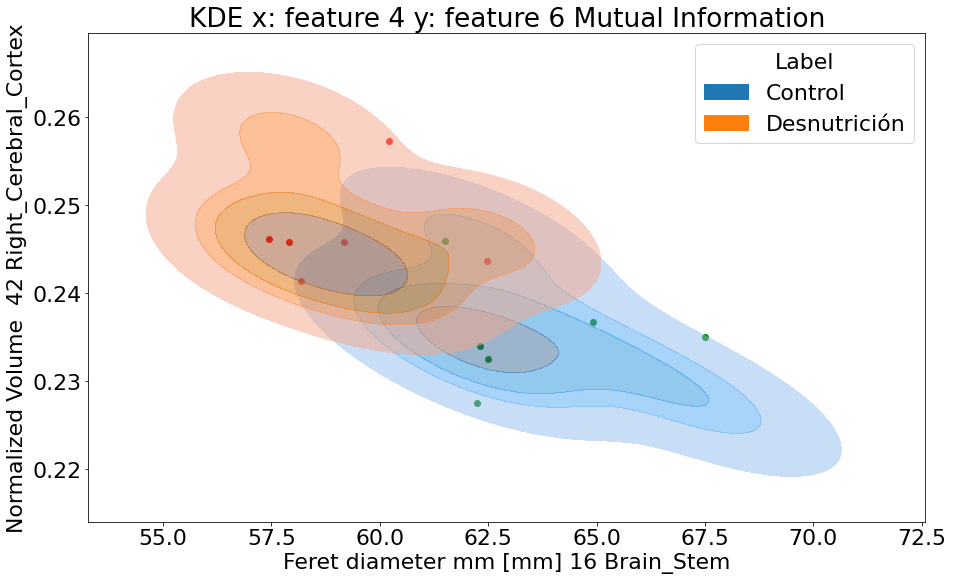

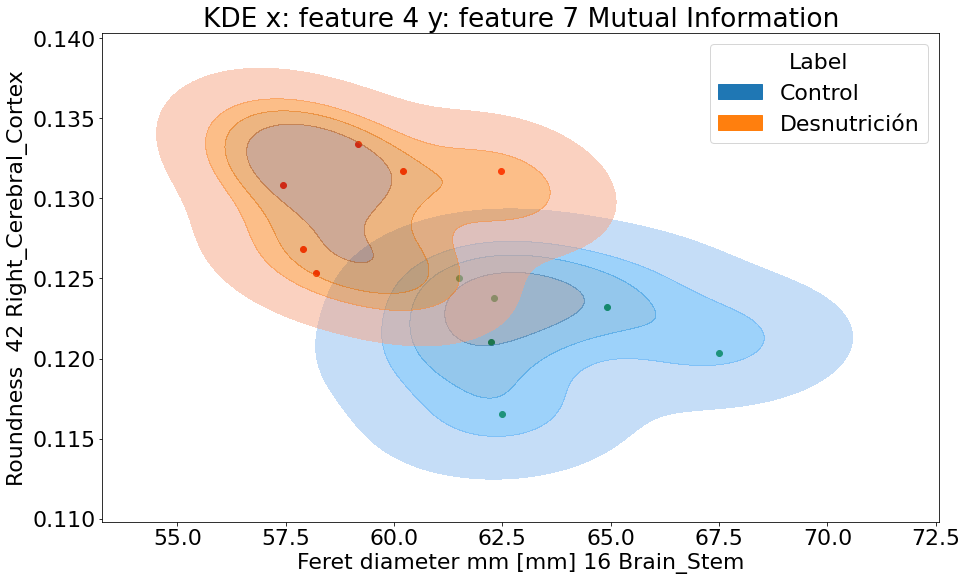

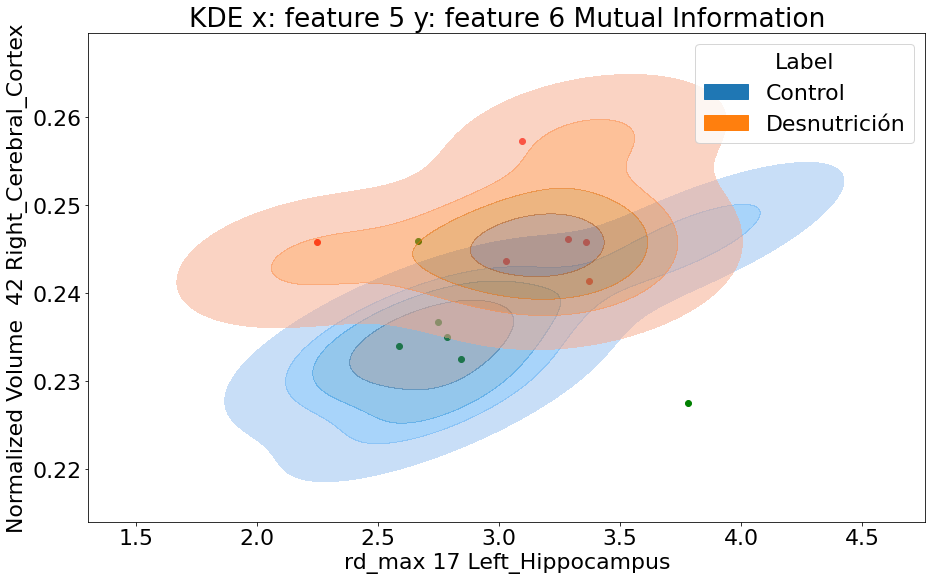

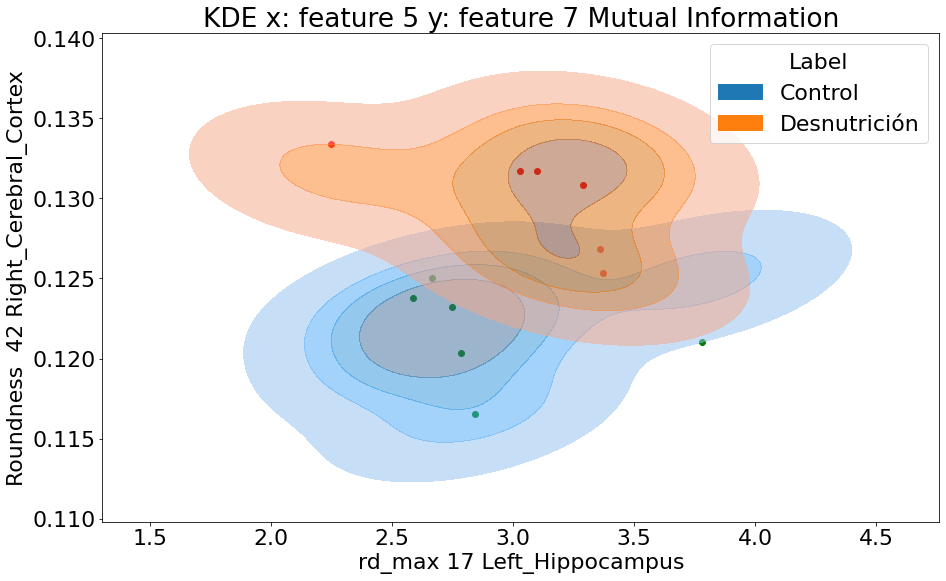

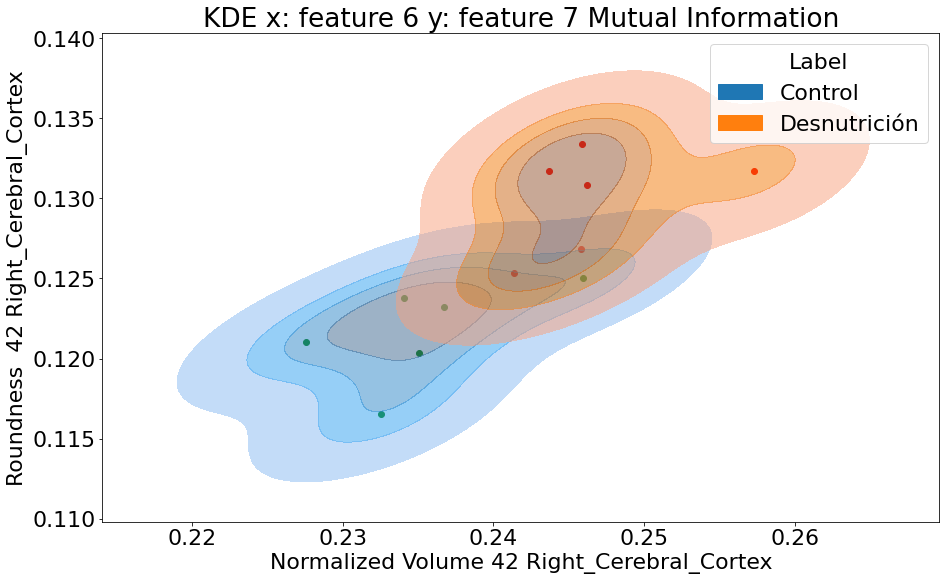

In [31]:
import seaborn as sns

def kde_plots(df, selector):
    df_dropped = mri_completed
    all_f_sorted_5 = df[["Region", "Feature"]]
    for i in range (0,len(all_f_sorted_5)):
        for j in range (i+1,len(all_f_sorted_5)):
            df_temporal = pd.DataFrame()
            df_join = pd.DataFrame()
            df_dropped_sorted = df_dropped.sort_values("Label", ascending=True)
            lista = list(df_dropped_sorted[df_dropped_sorted["Region Name"] == all_f_sorted_5["Region"].iloc[i]][all_f_sorted_5["Feature"].iloc[i]])
            column1 = all_f_sorted_5["Feature"].iloc[i] +" " + str(all_f_sorted_5["Region"].iloc[i])
            df_temporal[column1] = lista
            df_temporal2 = pd.DataFrame()
            lista2 = list(df_dropped_sorted[df_dropped_sorted["Region Name"] == all_f_sorted_5["Region"].iloc[j]][all_f_sorted_5["Feature"].iloc[j]])
            column2 = all_f_sorted_5["Feature"].iloc[j] +"  " + str(all_f_sorted_5["Region"].iloc[j])
            df_temporal2[column2]= lista2
            df_join = df_temporal.join(df_temporal2)
            df_join["Label"] = ["Control","Control","Control","Control","Control","Control","Desnutrición","Desnutrición","Desnutrición","Desnutrición","Desnutrición","Desnutrición"]
    #         print(df_join)
            if df_join[column1][0] != df_join[column2][0]:
                plt.scatter( x = df_dropped[df_dropped["Label"] == 0][all_f_sorted_5["Feature"].iloc[i]][df_dropped["Region Name"] == all_f_sorted_5["Region"].iloc[i]],
                         y = df_dropped[df_dropped["Label"] == 0][all_f_sorted_5["Feature"].iloc[j]][df_dropped["Region Name"] == all_f_sorted_5["Region"].iloc[j]], color = 'g')
                plt.scatter( x = df_dropped[df_dropped["Label"] == 1][all_f_sorted_5["Feature"].iloc[i]][df_dropped["Region Name"] == all_f_sorted_5["Region"].iloc[i]],
                             y = df_dropped[df_dropped["Label"] == 1][all_f_sorted_5["Feature"].iloc[j]][df_dropped["Region Name"] == all_f_sorted_5["Region"].iloc[j]], color = 'r')
                sns.kdeplot(data = df_join, x=column1, y=column2, hue="Label", fill=True, levels=5, alpha = 0.5)
                plt.title("KDE x: feature " + str(i+1) + " y: feature " + str(j+1) + " " + selector)
                # plt.savefig("feature selection plots/kde_" + str(i+1) + "_" + str(j+1) + "_" + selector + ".png")
                plt.show()
                plt.close()
            # print(df_dict)

kde_plots(df_features_ANOVA_01, "ANOVA")
kde_plots(df_mi_features_035, "Mutual Information")